In [13]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [14]:
img = cv2.imread('qwerty.jpg', -1)

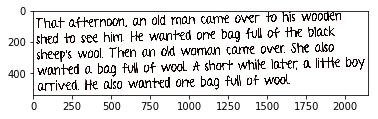

In [15]:
plt.imshow(img)

In [4]:
img = cv2.GaussianBlur(img,(5,5),0)

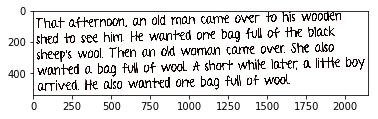

In [16]:
plt.imshow(img)

In [17]:
size_tup = img.shape


In [18]:
b,g,r = cv2.split(img)

In [19]:
img2 = cv2.merge([r,g,b])

In [20]:
my_mask= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
print(img.shape)

(538, 2146, 3)


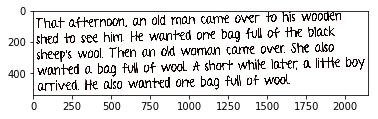

In [22]:
plt.imshow(img)

In [23]:
print(pytesseract.image_to_string(img))

That atrernoon, an old man came over to his wooaen
shed to see him. He wanted one bag full of the black
sheep's wool. Then an old woman came Over. She also
wanted a bag full of wool. A short white later, a litte boy
arrived. He also wanted one bag full of wool.
